In [ ]:
#!pip install plotly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## For this part of the code I am using dataset from Part 1 of the code, after we complete EDA a cleaned_data.csv will be exported we will be using same csv file for futher operations.

In [ ]:
df = pd.read_csv('cleaned_data.csv')
df

,account_name,incorporated_country,Evaluation_status,Scope_3_emissions_type,Scope_3_emissions_amount,Year,Employee_Count,Primary activity,Primary sector,Primary industry,...,grossProfit_USD,netIncome_USD,cashAndCashEquivalents_USD,shortTermInvestments_USD,longTermInvestments_USD,totalAssets_USD,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD
0,3i Group,United Kingdom,1,Waste generated in operations,12.340,2013,-9116.094019,Asset managers,Financial services,Services,...,9.385300e+08,6.565900e+08,8.166100e+08,0.000000e+00,4.460240e+09,5.572760e+09,1.371600e+09,4.460240e+09,1.078230e+09,4.201160e+09
1,3i Group,United Kingdom,1,Business travel,56.780,2013,-9116.094019,Asset managers,Financial services,Services,...,9.385300e+08,6.565900e+08,8.166100e+08,0.000000e+00,4.460240e+09,5.572760e+09,1.371600e+09,4.460240e+09,1.078230e+09,4.201160e+09
2,ABM INDUSTRIES INC,USA,1,Business travel,1706.230,2013,110000.000000,Commercial services,Commercial & consumer services,Services,...,4.958520e+08,7.290000e+07,3.263900e+07,0.000000e+00,3.595100e+07,2.119236e+09,1.201729e+09,3.595100e+07,3.148700e+08,9.175070e+08
3,Abbott Laboratories,USA,1,Purchased goods and services,5802000.000,2013,69000.000000,Health care supplies,Medical equipment & supplies,"Biotech, health care & pharma",...,1.180800e+10,2.576000e+09,3.475000e+09,4.623000e+09,1.190000e+08,4.295300e+10,1.768600e+10,4.742000e+09,6.561000e+09,2.526700e+10
4,Abbott Laboratories,USA,1,Capital goods,504000.000,2013,69000.000000,Health care supplies,Medical equipment & supplies,"Biotech, health care & pharma",...,1.180800e+10,2.576000e+09,3.475000e+09,4.623000e+09,1.190000e+08,4.295300e+10,1.768600e+10,4.742000e+09,6.561000e+09,2.526700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112298,Triple Flag Precious Metals Corp.,Canada,1,Business travel,79.000,2023,0.000000,Other financial,Specialized professional services,Services,...,1.035722e+08,3.628200e+07,1.729008e+07,1.387564e+07,5.127133e+07,1.884771e+09,8.329465e+07,6.514697e+07,5.884339e+07,1.801477e+09
112299,Triple Flag Precious Metals Corp.,Canada,1,Employee commuting,3.000,2023,0.000000,Other financial,Specialized professional services,Services,...,1.035722e+08,3.628200e+07,1.729008e+07,1.387564e+07,5.127133e+07,1.884771e+09,8.329465e+07,6.514697e+07,5.884339e+07,1.801477e+09
112300,Triple Flag Precious Metals Corp.,Canada,1,Investments,14935.000,2023,0.000000,Other financial,Specialized professional services,Services,...,1.035722e+08,3.628200e+07,1.729008e+07,1.387564e+07,5.127133e+07,1.884771e+09,8.329465e+07,6.514697e+07,5.884339e+07,1.801477e+09
112301,"Senao International Co., Ltd.",Taiwan,1,Waste generated in operations,6.189,2023,-9042.890625,Consumer goods wholesale & rental,"Trading, wholesale, distribution, rental & lea...",Retail,...,9.415419e+07,2.187599e+07,6.791520e+07,0.000000e+00,4.880268e+07,3.048321e+08,1.056508e+08,4.880268e+07,2.037295e+07,1.991813e+08


In [ ]:
df.isnull().sum()

account_name                  0
incorporated_country          0
Evaluation_status             0
Scope_3_emissions_type        0
Scope_3_emissions_amount      0
Year                          0
Employee_Count                0
Primary activity              0
Primary sector                0
Primary industry              0
Third_party_verification      0
Revenue_USD                   0
Market_Cap_USD                0
ebitda_USD                    0
grossProfit_USD               0
netIncome_USD                 0
cashAndCashEquivalents_USD    0
shortTermInvestments_USD      0
longTermInvestments_USD       0
totalAssets_USD               0
totalLiabilities_USD          0
totalInvestments_USD          0
totalDebt_USD                 0
totalEquity_USD               0
dtype: int64

## Further Operations on the dataset

If two columns in a dataset, such as shortTermInvestment and longTermInvestment, have a high correlation, it is often unnecessary to include both in a machine learning model. This is because highly correlated features provide similar information, which can lead to redundancy. Retaining both may increase model complexity without improving performance. Instead, one of the columns can be removed during feature selection to simplify the model and reduce overfitting risks.

I will now list correlation coefficient of 0.7 or higher as  higher indicates a strong linear relationship between two features. When two features are this strongly correlated, they often carry redundant information. Removing one of the features can reduce multicollinearity, simplify the model, and improve interpretability without significantly impacting predictive performance

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr()

# Find pairs of columns with correlation higher than 0.7
high_correlation_pairs = []
for i in range(len(corr_matrix.columns)):
  for j in range(i + 1, len(corr_matrix.columns)):
    col1 = corr_matrix.columns[i]
    col2 = corr_matrix.columns[j]
    correlation = corr_matrix.loc[col1, col2]
    if abs(correlation) > 0.7:
      high_correlation_pairs.append((col1, col2, correlation))

# Print the pairs of columns with high correlation
for col1, col2, correlation in high_correlation_pairs:
  print(f"Columns '{col1}' and '{col2}' have a correlation of {correlation:.2f}")

Columns 'Employee_Count' and 'Revenue_USD' have a correlation of 0.99
Columns 'Employee_Count' and 'Market_Cap_USD' have a correlation of 0.79
Columns 'Employee_Count' and 'ebitda_USD' have a correlation of 0.99
Columns 'Employee_Count' and 'grossProfit_USD' have a correlation of 0.98
Columns 'Employee_Count' and 'netIncome_USD' have a correlation of 0.99
Columns 'Employee_Count' and 'cashAndCashEquivalents_USD' have a correlation of 0.98
Columns 'Employee_Count' and 'shortTermInvestments_USD' have a correlation of -0.79
Columns 'Employee_Count' and 'longTermInvestments_USD' have a correlation of 0.92
Columns 'Employee_Count' and 'totalAssets_USD' have a correlation of 0.98
Columns 'Employee_Count' and 'totalLiabilities_USD' have a correlation of 0.97
Columns 'Employee_Count' and 'totalInvestments_USD' have a correlation of 0.92
Columns 'Employee_Count' and 'totalDebt_USD' have a correlation of 0.99
Columns 'Employee_Count' and 'totalEquity_USD' have a correlation of 0.98
Columns 'Reve

In [ ]:
# Create a list to store columns to drop
columns_to_drop = []

# Iterate through the high correlation pairs and decide which column to keep
for col1, col2, correlation in high_correlation_pairs:
  if col1 not in columns_to_drop and col2 not in columns_to_drop:
    # Keep the column with the highest correlation with other variables (in absolute terms)
    correlation_col1 = corr_matrix[col1].drop(col1).abs().sum()
    correlation_col2 = corr_matrix[col2].drop(col2).abs().sum()

    if correlation_col1 > correlation_col2:
      columns_to_drop.append(col2)
    else:
      columns_to_drop.append(col1)

# Drop the selected columns from the DataFrame
#df = df.drop(columns=columns_to_drop)

print(f"Columns dropped: {columns_to_drop}")


Columns dropped: ['Employee_Count', 'Market_Cap_USD', 'Revenue_USD', 'grossProfit_USD', 'netIncome_USD', 'cashAndCashEquivalents_USD', 'shortTermInvestments_USD', 'longTermInvestments_USD', 'ebitda_USD', 'totalLiabilities_USD', 'totalInvestments_USD', 'totalAssets_USD', 'totalEquity_USD']


## Instead of using drop above I will manually see the columns then only drop it.

In [ ]:
df = df.drop(['Employee_Count', 'grossProfit_USD', 'totalLiabilities_USD', 'netIncome_USD', 'totalEquity_USD', 'totalDebt_USD', 'totalInvestments_USD','totalAssets_USD'], axis=1, errors='ignore')


## Now lets see the Correlation Matrix

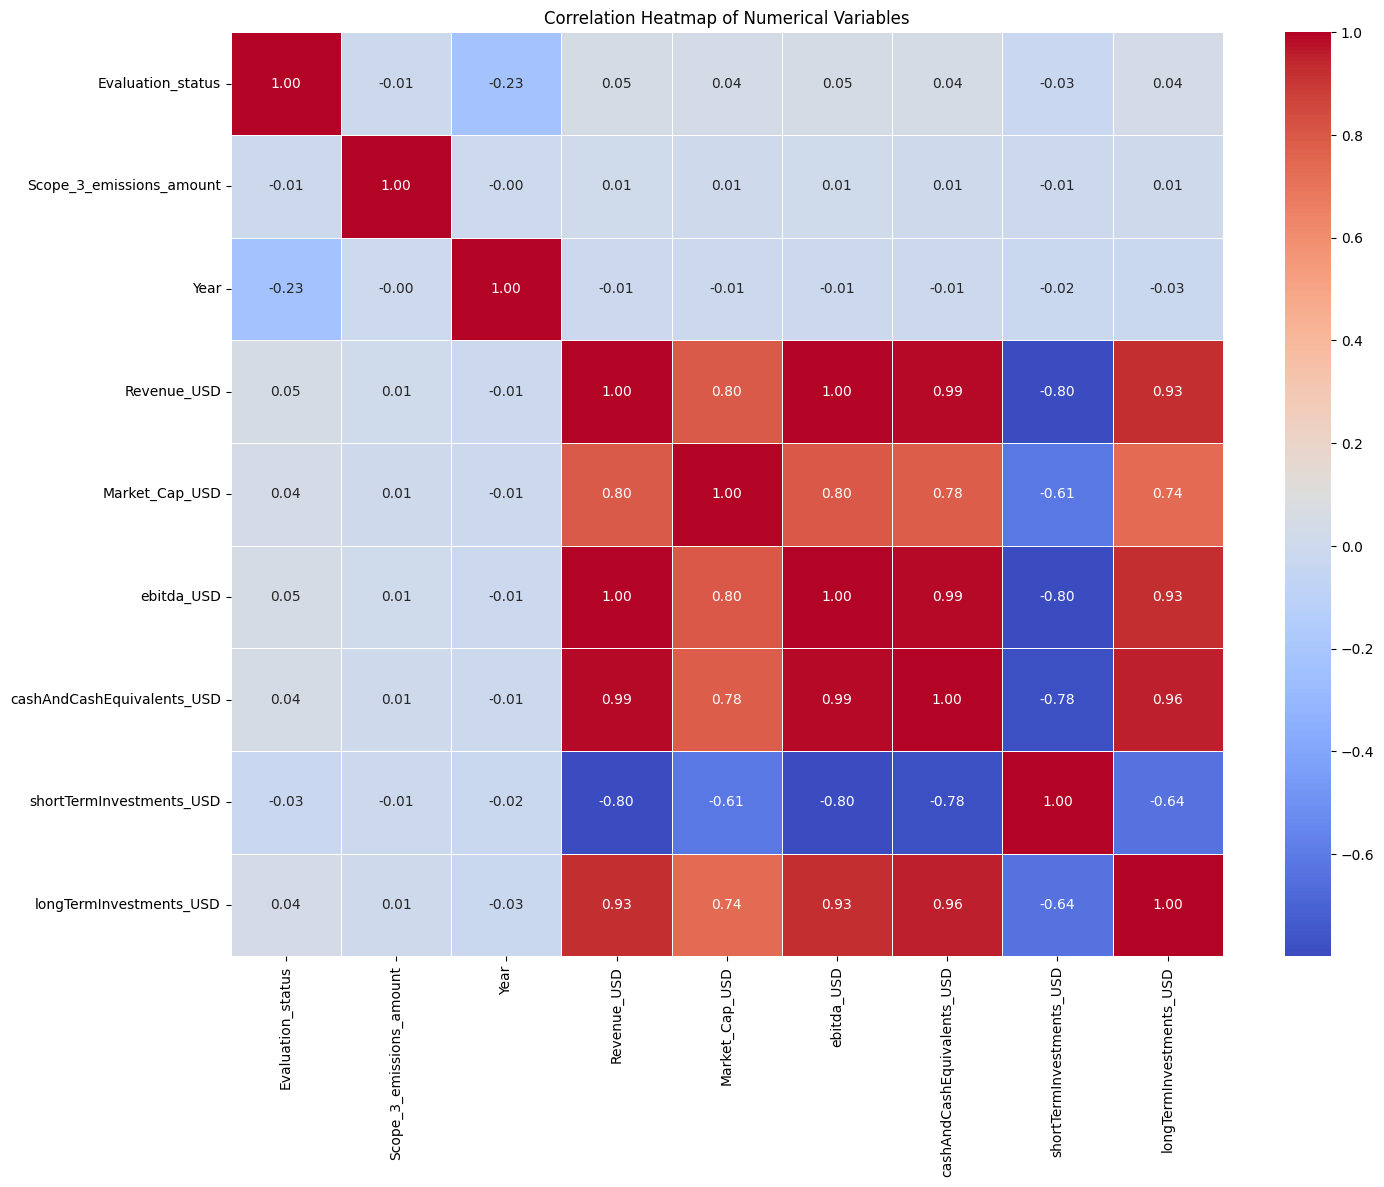

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(include=['number']).corr()

# Set the figure size
plt.figure(figsize=(16, 12))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title
plt.title('Correlation Heatmap of Numerical Variables')

# Display the plot
plt.show()

# For further making easier to predict lets narrow down the country by converting them into regions.

In [ ]:
#Map countries to new region column
country_to_region = {
    'United Kingdom': 'Europe',
    'USA': 'North America',
    'Italy': 'Europe',
    'India': 'Asia',
    'Spain': 'Europe',
    'France': 'Europe',
    'Switzerland': 'Europe',
    'Netehrlands': 'Europe',
    'Japan': 'Asia',
    'South Africa': 'Africa',
    'Canada': 'North America',
    'New Zealand': 'Oceania',
    'Turkey': 'Asia',
    'Germany': 'Europe',
    'Australia': 'Oceania',
    'Luxembourg': 'Europe',
    'Taiwan': 'Asia',
    'Norway': 'Europe',
    'Sweden': 'Europe',
    'Austria': 'Europe',
    'Brazil': 'South America',
    'Portugal': 'Europe',
    'China': 'Asia',
    'Singapore': 'Asia',
    'South Korea': 'Asia',
    'Russia': 'Europe',
    'Denmark': 'Europe',
    'Ireland': 'Europe',
    'Belgium': 'Europe',
    'Finland': 'Europe',
    'Poland': 'Europe',
    'Malaysia': 'Asia',
    'Mexico': 'North America',
    'Thailand': 'Asia',
    'Vietnam': 'Asia',
    'Philippines': 'Asia',
    'Indonesia': 'Asia',
    'Greece': 'Europe',
    'Chile': 'South America',
    'Argentina': 'South America',
    'Peru': 'South America',
    'Colombia': 'South America',
    'Ecuador': 'South America',
    'Uruguay': 'South America',
    'Paraguay': 'South America',
    'Bolivia': 'South America',
    'Venezuela': 'South America',
    'Panama': 'North America',
    'Costa Rica': 'North America',
    'Honduras': 'North America',
    'El Salvador': 'North America',
    'Nicaragua': 'North America',
    'Guatemala': 'North America',
    'Belize': 'North America',
    'Hungary': 'Europe',
    'Israel': 'Asia',
    'Cyprus': 'Europe',
    'United Arab Emirates': 'Asia',
    'Bermuda': 'North America',
    'Poland': 'Europe',
    'Iceland': 'Europe',
    'Indonesia': 'Asia',
    'Czech Republic': 'Europe',
    'Cayman Islands': 'North America',
    'Egypt': 'Africa',
    'Saudi Arabia': 'Asia',
    'Qatar': 'Asia',
    'Malaysia': 'Asia',
    'Cambodia': 'Asia',
    'Estonia': 'Europe',
    'Marshall Islands': 'Oceania',
    'Ukraine': 'Europe',
    'Lithuania': 'Europe',
    'Netherlands': 'Europe',
    'Romania': 'Europe',
    'Pakistan': 'Asia'
}

df['region'] = df['incorporated_country'].map(country_to_region)

## BEFORE THAT lets check if there are some values missing.

In [ ]:
df.isna().sum()

account_name                  0
incorporated_country          0
Evaluation_status             0
Scope_3_emissions_type        0
Scope_3_emissions_amount      0
Year                          0
Primary activity              0
Primary sector                0
Primary industry              0
Third_party_verification      0
Revenue_USD                   0
Market_Cap_USD                0
ebitda_USD                    0
cashAndCashEquivalents_USD    0
shortTermInvestments_USD      0
longTermInvestments_USD       0
region                        0
dtype: int64

## Using the code below I have manually compiled above country to region.

In [ ]:
# Display incorporated countries with missing region values
missing_region_countries = df[df['region'].isnull()]['incorporated_country'].unique()
print(f"Incorporated countries with missing region values:\n{missing_region_countries}")


Incorporated countries with missing region values:
[]


# Checking if there are any negative value in the columns still

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
negative_values = df[numerical_cols][df[numerical_cols] < 0].any()

# Print the result
negative_values


Evaluation_status             False
Scope_3_emissions_amount      False
Year                          False
Revenue_USD                   False
Market_Cap_USD                False
ebitda_USD                     True
cashAndCashEquivalents_USD     True
shortTermInvestments_USD       True
longTermInvestments_USD        True
dtype: bool

In [ ]:
# Replace negative values in numerical columns with their absolute values
for col in ['ebitda_USD', 'cashAndCashEquivalents_USD', 'shortTermInvestments_USD', 'longTermInvestments_USD']:
    df[col] = df[col].abs()

# Applying Target Encoding for categorical variables where using this we can achieve following:

- Captures Relationship with Target: Target encoding can effectively capture the relationship between categorical features and the target variable (Scope 3 emissions amount), which is crucial for predictive modeling.

- Reduces Dimensionality: Unlike one-hot encoding, which can significantly increase the number of features, target encoding keeps the feature count low, making the model more efficient.

- Handles High Cardinality: It is particularly useful for features with many unique categories, such as Primary activity and Scope_3_emissions_type.

# What have I done?

Target Encoding:
Where I have replaced categorical values with the mean of the target variable (e.g., Scope 3 emissions amount) for each category. This reduces the number of features and can capture the relationship between the category and the target.

In [ ]:
df['Scope_3_emissions_type'].unique()

array(['Waste generated in operations', 'Business travel',
       'Purchased goods and services', 'Capital goods',
       'Upstream transportation and distribution', 'Employee commuting',
       'Upstream leased assets', 'Investments',
       'Downstream transportation and distribution',
       'Processing of sold products', 'Use of sold products',
       'End of life treatment of sold products',
       'Downstream leased assets', 'Franchises', 'Other (upstream)',
       'Other (downstream)',
       'Fuel-and-energy-related activities (not included in Scope 1 or 2)'],
      dtype=object)

In [ ]:
import numpy as np
import pandas as pd
import pickle
import json
import os
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import category_encoders as ce

# Suppress warnings
warnings.filterwarnings('ignore')
df=df.drop['account_name']
# categorical columns to be target encoded
cat_cols = ['incorporated_country',
            'Primary activity', 'Primary sector', 'Primary industry',
            'Third_party_verification', 'region']

# emission types (for reverse mapping)
emission_types = [
    'Business travel',
    'Employee commuting',
    'Downstream leased assets',
    'Fuel-and-energy-related activities (not included in Scope 1 or 2)',
    'Waste generated in operations',
    'Upstream transportation and distribution',
    'Use of sold products',
    'Downstream transportation and distribution',
    'End of life treatment of sold products',
    'Purchased goods and services',
    'Processing of sold products',
    'Capital goods',
    'Other (upstream)',
    'Upstream leased assets',
    'Investments',
    'Franchises',
    'Other (downstream)'
]

# dictionary mapping numerical labels to emission type names
emission_type_dict = {i + 1: emission_types[i] for i in range(len(emission_types))}


#  unique emission types
unique_emission_types = df['Scope_3_emissions_type'].unique()
print("Unique Emission Types:", unique_emission_types)

# target encoding and model training for each emission type
results_per_type = {}

for emission_type in unique_emission_types:
    # Filter data
    df_filtered = df[df['Scope_3_emissions_type'] == emission_type]

    # Check if filtered data is not empty
    if not df_filtered.empty:
        # target encoding on categorical columns
        encoder = ce.TargetEncoder(cols=cat_cols)
        df_filtered[cat_cols] = encoder.fit_transform(df_filtered[cat_cols], df_filtered['Scope_3_emissions_amount'])

        # Saving
        mapping_filename = f"{emission_type.replace(' ', '_').replace('/', '_')}.pkl"
        with open(mapping_filename, "wb") as f:
            pickle.dump(encoder.mapping, f)
        print(f"Saved target encoding mappings for {emission_type} as {mapping_filename}")

        # features (X) and target (y)
        X = df_filtered.drop(['Scope_3_emissions_amount', 'Scope_3_emissions_type'], axis=1)
        y = df_filtered['Scope_3_emissions_amount']

        # Split into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # pipeline with preprocessing and model training steps
        pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('xgb', XGBRegressor(random_state=42))
        ])

        # parameter grid for GridSearchCV
        param_grid = {
            'xgb__learning_rate': [0.01, 0.1],
            'xgb__max_depth': [5, 7],
            'xgb__n_estimators': [50, 70],
            'xgb__subsample': [0.5, 0.7],
            'xgb__colsample_bytree': [0.5, 0.7],
            'xgb__gamma': [0, 1]
        }

        # hyperparameter tuning with GridSearchCV
        grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                                   scoring='neg_mean_absolute_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # model from GridSearchCV
        best_model = grid_search.best_estimator_

        # Define the directory for saving models
        models_dir = "models"
        os.makedirs(models_dir, exist_ok=True)
        if not os.path.exists(model_filename):
            with open(model_filename, "wb") as f:
                pickle.dump(best_model, f)
            print(f"Saved trained model for {emission_type} as {model_filename}")
        else:
            print(f"Model file for {emission_type} already exists at {model_filename}")
        # Saving
        model_filename = os.path.join(models_dir, f"{emission_type.replace(' ', '_').replace('/', '_')}.pkl")
        with open(model_filename, "wb") as f:
            pickle.dump(best_model, f)
        print(f"Saved trained model for {emission_type} as {model_filename}")

        # Evaluating model performance on test set
        y_pred = best_model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)

        # Storing results
        results_per_type[emission_type] = {
            "mae": mae,
            "best_params": grid_search.best_params_
        }

        print(f"Mean Absolute Error for {emission_type}: {mae}")

    else:
        print(f"No data found for emission type: {emission_type}")

# Reverse mapping
reverse_mapping = {v: k for k, v in emission_type_dict.items()}
with open("reverse_mapping.json", "w") as f:
    json.dump(reverse_mapping, f, indent=4)
print("Saved reverse mapping to reverse_mapping.json")



for emission_type, metrics in results_per_type.items():
    print(f"Emission Type: {emission_type}")
    print(f"Mean Absolute Error: {metrics['mae']}")
    print(f"Best Parameters: {metrics['best_params']}")


Unique Emission Types: ['Waste generated in operations' 'Business travel'
 'Purchased goods and services' 'Capital goods'
 'Upstream transportation and distribution' 'Employee commuting'
 'Upstream leased assets' 'Investments'
 'Downstream transportation and distribution'
 'Processing of sold products' 'Use of sold products'
 'End of life treatment of sold products' 'Downstream leased assets'
 'Franchises' 'Other (upstream)' 'Other (downstream)'
 'Fuel-and-energy-related activities (not included in Scope 1 or 2)']
Saved target encoding mappings for Waste generated in operations as Waste_generated_in_operations.pkl
Saved trained model for Waste generated in operations as Waste_generated_in_operations.pkl
Mean Absolute Error for Waste generated in operations: 82573.38890047235
Saved target encoding mappings for Business travel as Business_travel.pkl
Saved trained model for Business travel as Business_travel.pkl
Mean Absolute Error for Business travel: 221718.967666577
Saved target encodi

Saved feature importance plot for Business travel as Business_travel_feature_importance.png


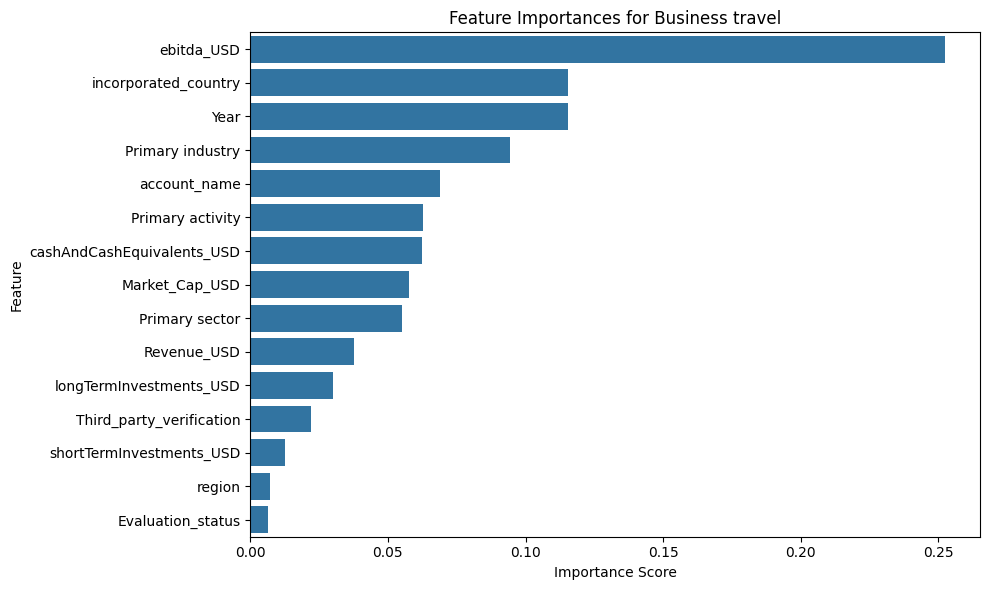

Saved feature importance plot for Employee commuting as Employee_commuting_feature_importance.png


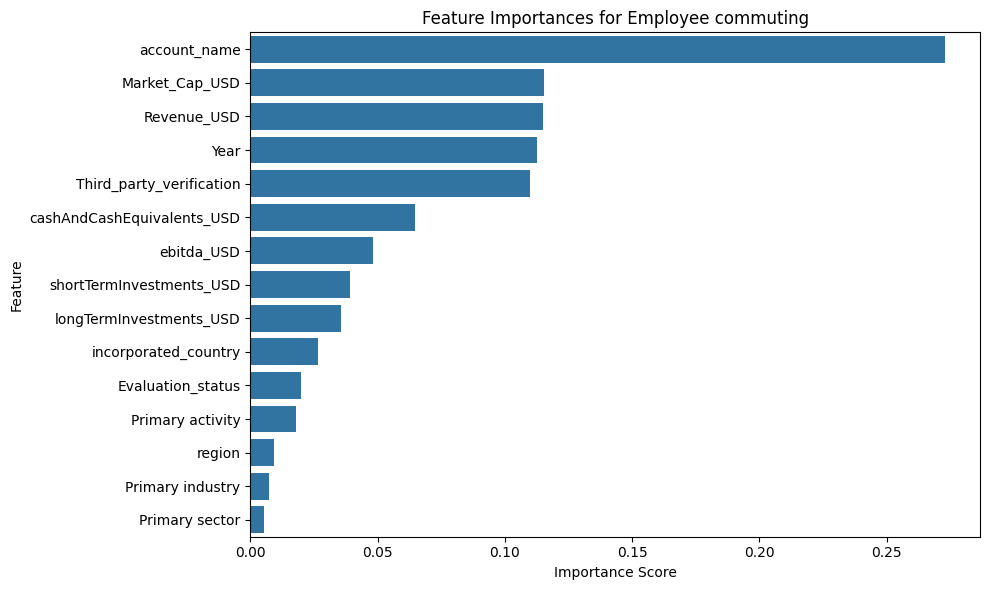

Saved feature importance plot for Downstream leased assets as Downstream_leased_assets_feature_importance.png


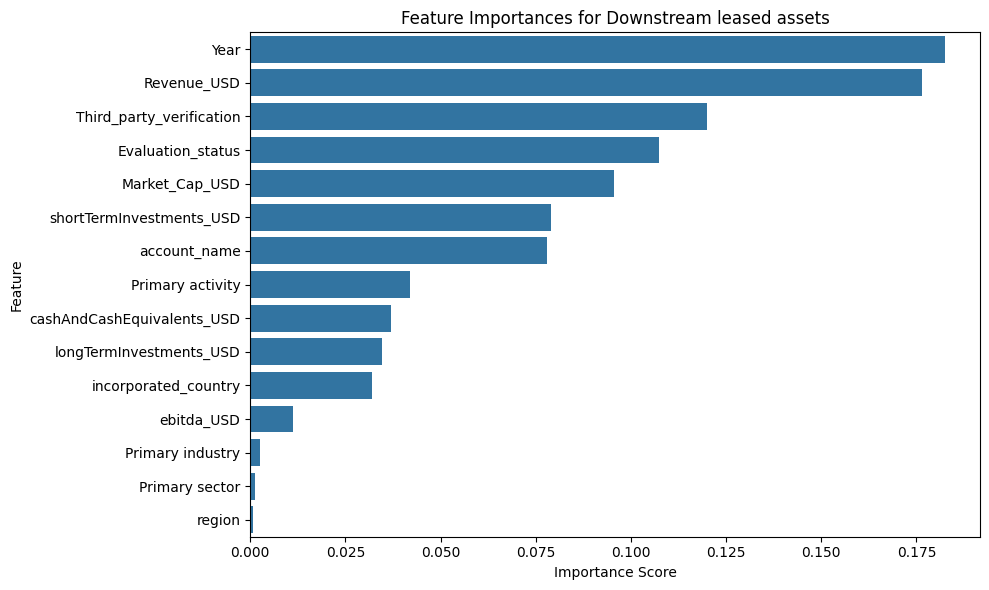

Model file not found for Fuel-and-energy-related activities (not included in Scope 1 or 2): Fuel-and-energy-related_activities_not_included_in_Scope_1_or_2.pkl
Saved feature importance plot for Waste generated in operations as Waste_generated_in_operations_feature_importance.png


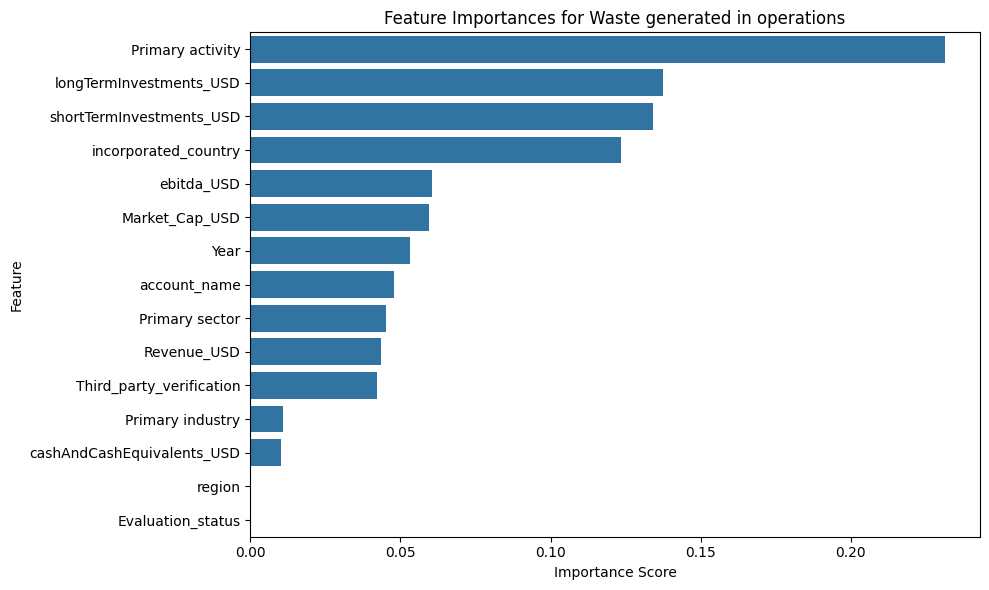

Saved feature importance plot for Upstream transportation and distribution as Upstream_transportation_and_distribution_feature_importance.png


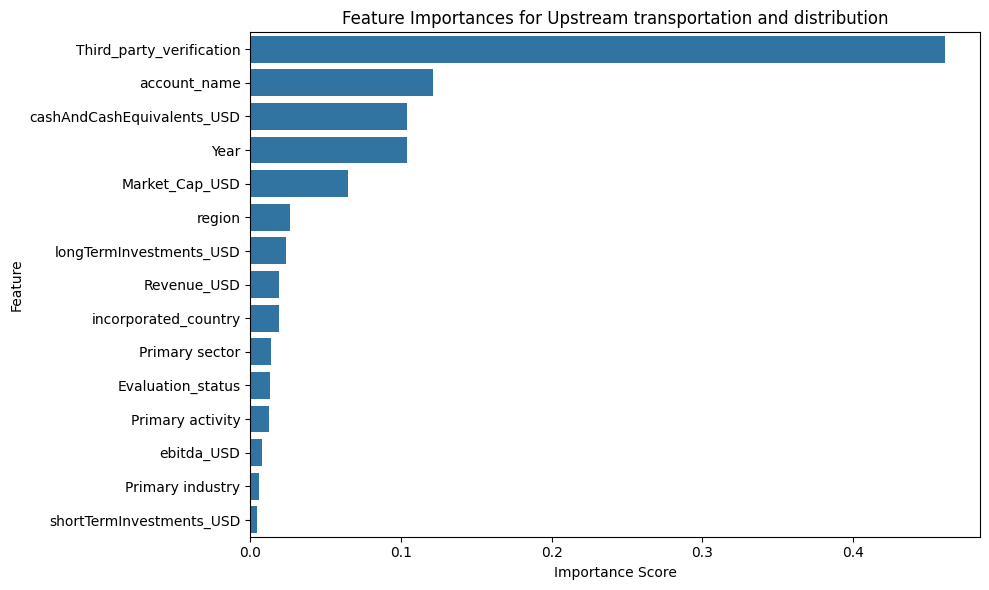

Saved feature importance plot for Use of sold products as Use_of_sold_products_feature_importance.png


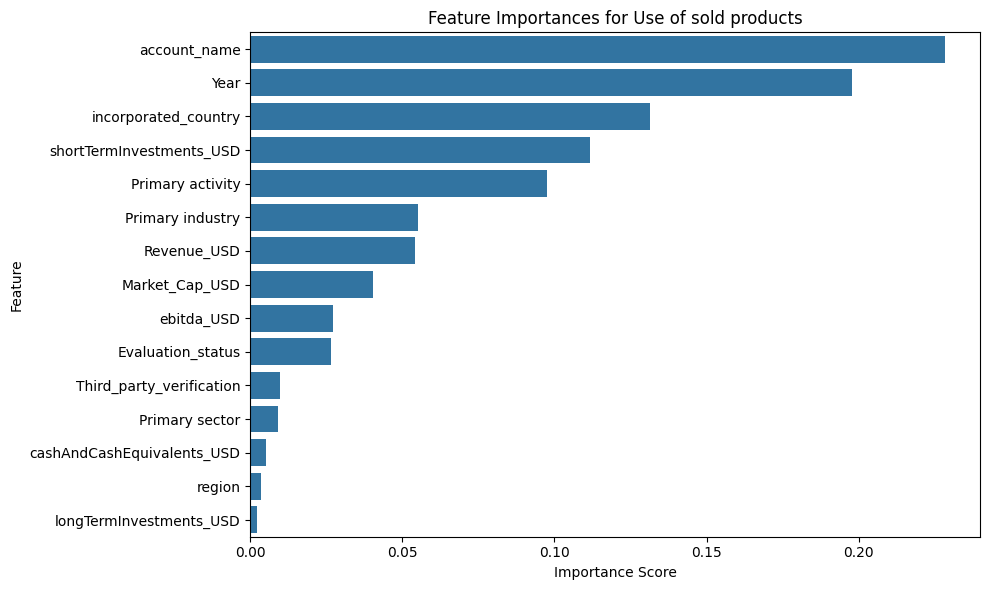

Saved feature importance plot for Downstream transportation and distribution as Downstream_transportation_and_distribution_feature_importance.png


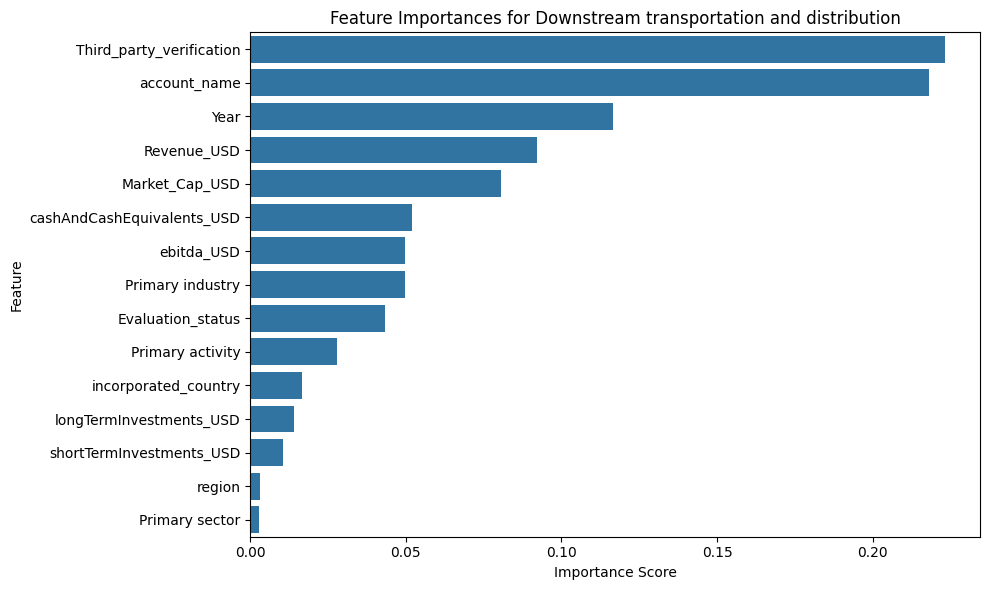

Saved feature importance plot for End of life treatment of sold products as End_of_life_treatment_of_sold_products_feature_importance.png


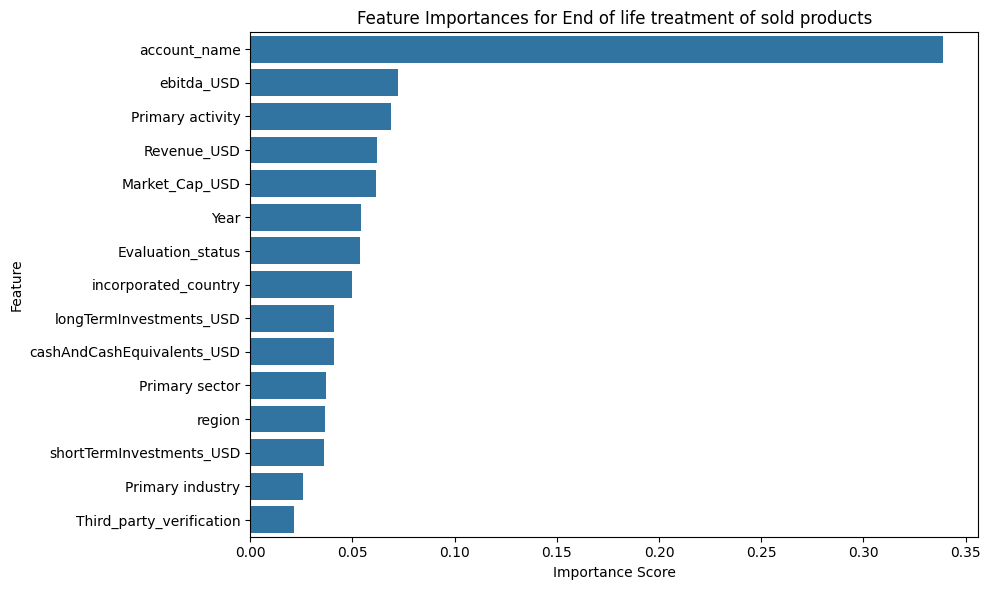

Saved feature importance plot for Purchased goods and services as Purchased_goods_and_services_feature_importance.png


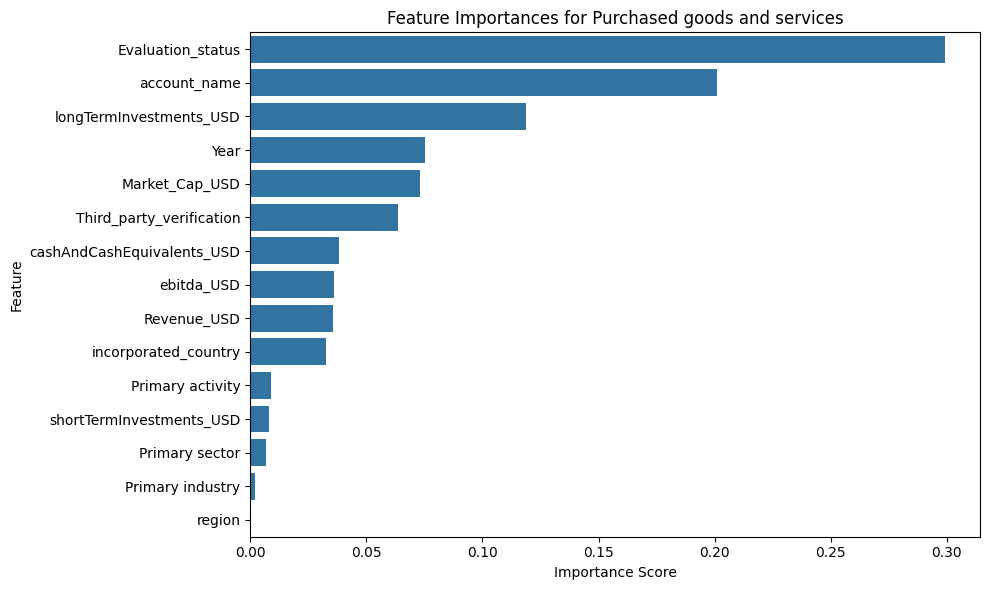

Saved feature importance plot for Processing of sold products as Processing_of_sold_products_feature_importance.png


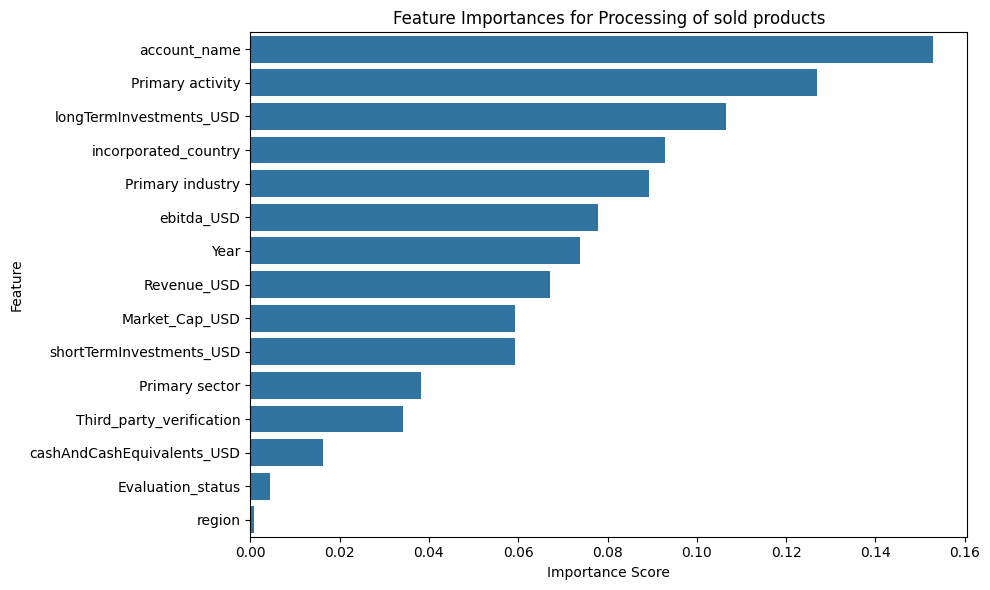

Saved feature importance plot for Capital goods as Capital_goods_feature_importance.png


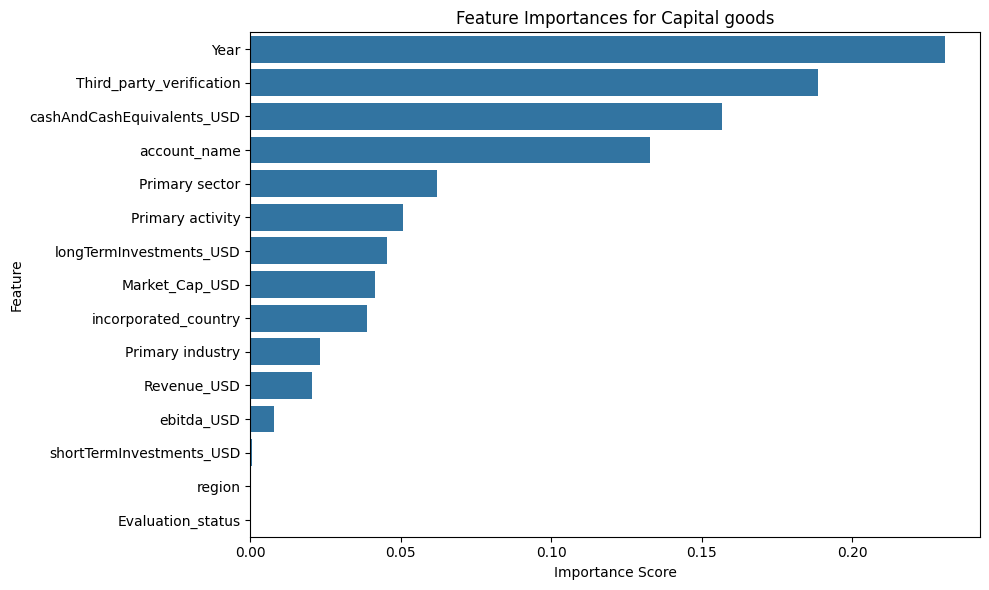

Model file not found for Other (upstream): Other_upstream.pkl
Saved feature importance plot for Upstream leased assets as Upstream_leased_assets_feature_importance.png


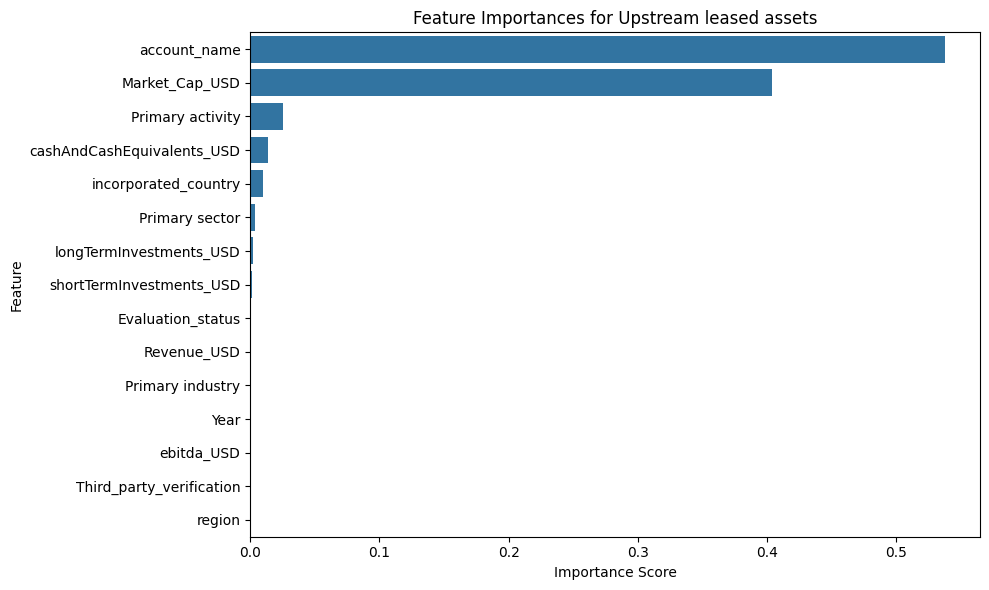

Saved feature importance plot for Investments as Investments_feature_importance.png


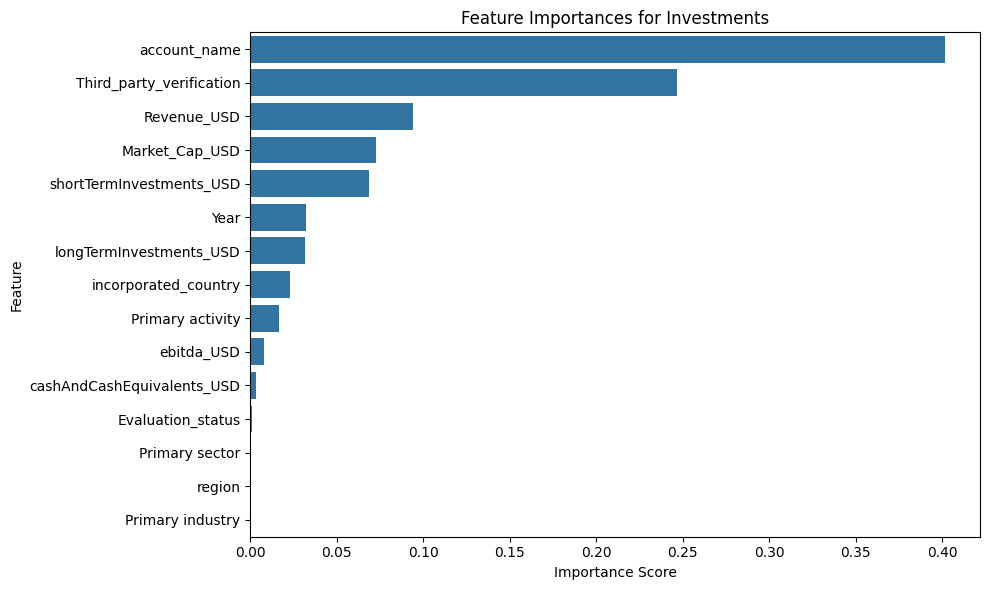

Saved feature importance plot for Franchises as Franchises_feature_importance.png


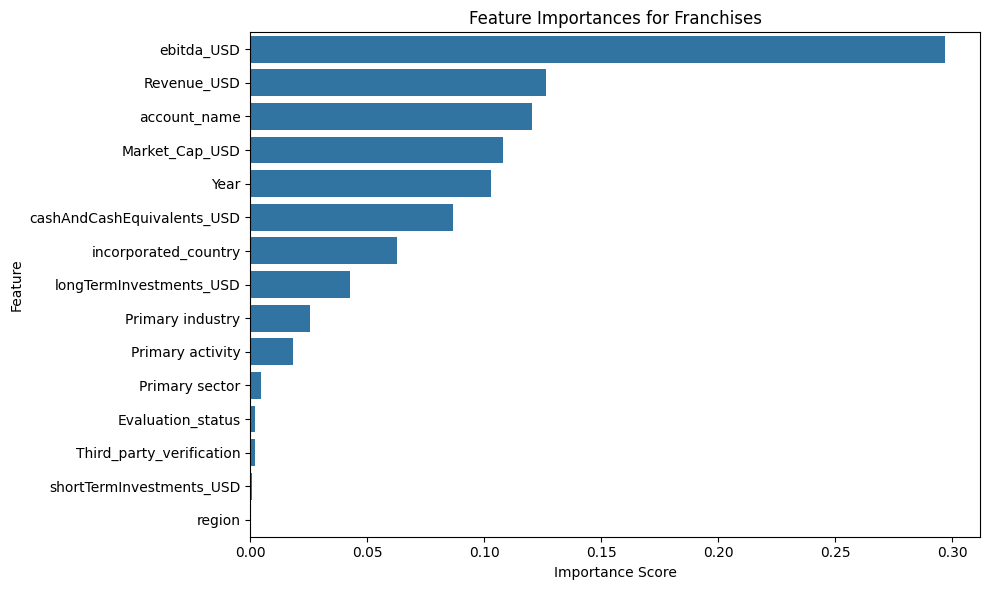

Model file not found for Other (downstream): Other_downstream.pkl


In [ ]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


for emission_type in emission_types:
    safe_emission_type = emission_type.replace(' ', '_').replace('/', '_').replace('(', '').replace(')', '').replace('&', 'and')
    model_filename = f"{safe_emission_type}.pkl"

    if os.path.exists(model_filename):
        # Load the model
        with open(model_filename, "rb") as f:
            model = pickle.load(f)

        xgb_model = model.named_steps['xgb']

        feature_importances = xgb_model.feature_importances_

        feature_names = df.drop(['Scope_3_emissions_amount', 'Scope_3_emissions_type'], axis=1).columns

        if len(feature_names) != len(feature_importances):
            print(f"Warning: Mismatch in feature names ({len(feature_names)}) and feature importances ({len(feature_importances)}) for {emission_type}.")
            min_length = min(len(feature_names), len(feature_importances))
            feature_names = feature_names[:min_length]
            feature_importances = feature_importances[:min_length]

        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importances
        })

        feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title(f'Feature Importances for {emission_type}')
        plt.xlabel('Importance Score')
        plt.ylabel('Feature')
        plt.tight_layout()

        plot_filename = f"{safe_emission_type}_feature_importance.png"
        plt.savefig(plot_filename)

        print(f"Saved feature importance plot for {emission_type} as {plot_filename}")
        plt.show()

    else:
        print(f"Model file not found for {emission_type}: {model_filename}")


This code evaluates pre-trained machine learning models (saved as .pkl files) for predicting "Scope 3 emissions amount" for the year 2023. It compares actual vs. predicted values and visualizes the results using scatter plots.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset (replace 'cleaned_data.csv' with your dataset file)
data = df

# Filter data for the year 2023
data_2023 = data[data['Year'] == 2023]

# List of Scope 3 emission types to evaluate
emission_types = data_2023['Scope_3_emissions_type'].unique()

# Directory containing your pre-trained model files
model_directory = '/'

# Function to clean and standardize model filenames
def get_model_filename(emission_type):
    return f"{model_directory}{emission_type.replace(' ', '_').replace('-', '_').replace('(', '').replace(')', '')}.pkl"

# Iterate through each emission type and evaluate models
for emission_type in emission_types:
    # Filter data for the current emission type
    emission_data = data_2023[data_2023['Scope_3_emissions_type'] == emission_type]

    # Features and target variable
    X = emission_data.drop(columns=['Scope_3_emissions_amount', 'Scope_3_emissions_type', 'Year'])
    y_actual = emission_data['Scope_3_emissions_amount']

    # Load the corresponding pre-trained model
    model_file = get_model_filename(emission_type)
    try:
        model = joblib.load(model_file)
    except FileNotFoundError:
        print(f"Model for {emission_type} not found. Skipping...")
        continue

    # Predict Scope 3 emissions
    y_predicted = model.predict(X)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_actual, y_predicted)
    rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))
    r2 = r2_score(y_actual, y_predicted)

    # Print metrics
    print(f"Results for {emission_type}:")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Root Mean Square Error: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}\n")

    # Create a scatter plot of Actual vs Predicted values
    results_df = pd.DataFrame({
        'Index': range(len(y_actual)),
        'Actual': y_actual,
        'Predicted': y_predicted
    })

    fig = px.scatter(
        results_df,
        x='Index',
        y=['Actual', 'Predicted'],
        title=f"Actual vs Predicted Scope 3 Emissions (2023) for {emission_type}",
        labels={'value': 'Scope 3 Emissions', 'variable': 'Variable'},
        template='plotly_white'
    )

    # Add evaluation metrics to the legend
    fig.update_layout(
        legend_title_text=f"Metrics: MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.2f}"
    )

    # Show the plot
    fig.show()


Model for Business travel not found. Skipping...
Model for Employee commuting not found. Skipping...
Model for Purchased goods and services not found. Skipping...
Model for Capital goods not found. Skipping...
Model for Fuel-and-energy-related activities (not included in Scope 1 or 2) not found. Skipping...
Model for Waste generated in operations not found. Skipping...
Model for Upstream leased assets not found. Skipping...
Model for Upstream transportation and distribution not found. Skipping...
Model for Use of sold products not found. Skipping...
Model for End of life treatment of sold products not found. Skipping...
Model for Downstream transportation and distribution not found. Skipping...
Model for Investments not found. Skipping...
Model for Franchises not found. Skipping...
Model for Processing of sold products not found. Skipping...
Model for Downstream leased assets not found. Skipping...
Model for Other (downstream) not found. Skipping...
Model for Other (upstream) not found

# As per the requirement set by Professor Kellen, I will now be creating 2 table code. (optional)

This code processes a dataset to compute summary statistics for "Scope 3 emissions amount" across different emission types for the years 2013–2022. It first ensures that the Scope_3_emissions_amount and Year columns are of the correct data types (float and int, respectively). The data is then filtered to include only rows where the year is less than 2023, creating a training subset (df_train). For each unique emission type in the column Scope_3_emissions_type, the code calculates key statistical metrics—count, minimum, maximum, mean, and standard deviation of the target variable (Scope_3_emissions_amount). These metrics are grouped into a summary table with renamed columns to align with a specific format (Table 1). Finally, the summary table is saved as a CSV file named table_1_summary_stats.csv, and a confirmation message is printed. This process provides descriptive insights into the distribution of emissions data for model training or analysis.

In [ ]:
df['Scope_3_emissions_amount'] = df['Scope_3_emissions_amount'].astype(float)
df['Year'] = df['Year'].astype(int)

# Filter data for years 2013-2022
df_train = df[df['Year'] < 2023]

# Summary statistics for each emission type
summary_stats = df_train.groupby('Scope_3_emissions_type')['Scope_3_emissions_amount'].agg(
    target_count='count',
    target_min='min',
    target_max='max',
    target_mean='mean',
    target_std='std'
).reset_index()

# Rename columns to match Table 1 format
summary_stats.columns = ['df_name', 'df_target_count', 'df_target_min', 'df_target_max', 'df_target_mean', 'df_target_std']

# Save Table 1 as a CSV file
summary_stats.to_csv('table_1_summary_stats.csv', index=False)
print("Table 1 saved as 'table_1_summary_stats.csv'")

Table 1 saved as 'table_1_summary_stats.csv'


This code evaluates the performance of three regression models—XGBRegressor, RandomForestRegressor, and ExtraTreesRegressor—on predicting "Scope 3 emissions amount" for each unique emission type in a dataset but for now we will only be using XGBoostRegressor. It first defines a wrapper class, SklearnXGBRegressor, to make XGBoost compatible with scikit-learn's API. The code loops through each emission type, filters the data accordingly, and skips categories with fewer than 10 observations. For each filtered dataset, it splits the features (X) and target (y), applies one-hot encoding to categorical variables, and calculates basic statistics for the target variable (minimum, maximum, mean, standard deviation). A naive baseline MAE is calculated by predicting the mean of the target variable.



The code then performs 5-fold cross-validation for each model using negative mean absolute error (MAE) as the scoring metric. It tracks the best-performing model based on the lowest cross-validated MAE mean and its standard deviation. The results for each emission type—including target statistics, naive MAE, best model, and cross-validation scores—are stored in a list and converted into a DataFrame. Finally, this DataFrame is saved as a CSV file named table_2_results.csv, providing a comprehensive summary of model performance for each emission type. This process enables comparison of models and identification of the most effective estimator for each emission type.

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
import xgboost as xgb

# Define a wrapper for XGBRegressor to make it compatible with scikit-learn
class SklearnXGBRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, **kwargs):
        self.model = xgb.XGBRegressor(**kwargs)

    def fit(self, X, y, **kwargs):
        self.model.fit(X, y, **kwargs)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return self.model.get_params(deep=deep)

    def set_params(self, **params):
        self.model.set_params(**params)
        return self

# Initialize results list
results_table_2 = []

# Defining models to test
models = {
    "XGBRegressor": SklearnXGBRegressor(random_state=42),
    # "RandomForestRegressor": RandomForestRegressor(random_state=42),
    # "ExtraTreeRegressor": ExtraTreesRegressor(random_state=42),
}

df_train = df


for emission_type in df_train['Scope_3_emissions_type'].unique():
    df_filtered = df_train[df_train['Scope_3_emissions_type'] == emission_type]
    if len(df_filtered) < 10:
        continue

    # Features and target split
    X = df_filtered.drop(['Scope_3_emissions_amount', 'Year'], axis=1)
    y = df_filtered['Scope_3_emissions_amount']

    # Encode categorical variables using one-hot encoding
    X_encoded = pd.get_dummies(X, drop_first=True)

    # Compute target statistics
    target_min = y.min()
    target_max = y.max()
    target_mean = y.mean()
    target_std = y.std()

    # Compute naive MAE (predicting mean)
    naive_predictions = [target_mean] * len(y)
    naive_mae = mean_absolute_error(y, naive_predictions)

    best_model_name = None
    best_mae_cv_score = float('inf')
    best_mae_std = None

    # Test each model
    for model_name, model in models.items():
        cv_scores = cross_val_score(
            model, X_encoded, y, cv=5, scoring='neg_mean_absolute_error'
        )
        mae_cv_mean = -np.mean(cv_scores)
        mae_cv_std = np.std(cv_scores)

        if mae_cv_mean < best_mae_cv_score:
            best_mae_cv_score = mae_cv_mean
            best_mae_std = mae_cv_std
            best_model_name = model_name

    # Appending the results
    results_table_2.append({
        "DataFrame": emission_type,
        "Best Estimator": best_model_name,
        "Observations": len(df_filtered),
        "Target Minimum": target_min,
        "Target Maximum": target_max,
        "Target Mean": target_mean,
        "Target Standard Deviation": target_std,
        "Target Naive MAE Mean": naive_mae,
        "Best MAE Mean CV Score": best_mae_cv_score,
        "Standard Deviation of MAE-CV Score": best_mae_std,
    })

# Converting results to DataFrame and saving as CSV
results_table_2_df = pd.DataFrame(results_table_2)
results_table_2_df.to_csv('table_2_results.csv', index=False)
print("Table 2 saved as 'table_2_results.csv'")


KeyboardInterrupt: 

Feature importance which features (or variables) in the dataset are most influential in predicting the target variable. Model file used here is generated from Regis server (code is present over there).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
import warnings
import joblib

warnings.filterwarnings(action='ignore', category=UserWarning, module='xgboost')

# Preparing features and target
X = df.drop('Scope_3_emissions_amount', axis=1)
y = df['Scope_3_emissions_amount']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the pipeline with a StandardScaler and XGBoost regressor
pipeline = Pipeline([
    # Imputing missing values with the mean
    ('imputer', SimpleImputer(strategy='mean')),
    # Used StandardScaler for feature scaling
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(
        device='cuda',
        random_state=42
    ))
])

param_grid = {
    # 100 values for learning rate
    'xgb__learning_rate': np.linspace(0.01, 0.3, 100),
    # Values from 1 to 100 for max_depth
    'xgb__max_depth': range(1, 101),

    # Values from 1 to 100 for n_estimators
    'xgb__n_estimators': range(1, 101),
    # 100 values from 0.1 to 1 for subsample
    'xgb__subsample': np.linspace(0.1, 1.0, 100),
    # 100 values from 0.1 to 1 for colsample_bytree
    'xgb__colsample_bytree': np.linspace(0.1, 1.0, 100),
    # 100 values from 0 to 1 for gamma
    'xgb__gamma': np.linspace(0, 1, 100)
}


# Researched on what we can do for better tuning and it was random search
# Using RandomizedSearchCV for more efficient hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, n_iter=50, random_state=42)

# Fitting the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best parameters: {random_search.best_params_}')
print(f'Best cross-validation MAE: {-random_search.best_score_}')

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Set Mean Absolute Error: {mae}')

# Save the best model to a file
joblib.dump(best_model, 'best_xgb_model.pkl')
print("Model saved to best_xgb_model.pkl")



In [ ]:
import joblib


model = joblib.load('best_xgb_model.pkl')

X_encoded = pd.get_dummies(df.drop(['Scope_3_emissions_amount', 'Year'], axis=1), drop_first=True)

xgb_model = model.named_steps['xgb']
feature_names = X_encoded.columns
feature_importances = xgb_model.feature_importances_[:len(feature_names)]

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()